📁 Please upload your 'Crop_recommendation.csv' file


Saving Crop_recommendation dataset.csv to Crop_recommendation dataset.csv

✅ Data Loaded Successfully!
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0610 - loss: 3.0809 - val_accuracy: 0.1733 - val_loss: 3.0298
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1827 - loss: 2.9746 - val_accuracy: 0.1733 - val_loss: 2.6690
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2195 - loss: 2.5214 - val_accuracy: 0.4886 - val_loss: 2.0888
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5761 - loss: 1.9457 - val_accuracy: 0.6023 - val_loss: 1.5622
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 1.4308 - val_accuracy: 0.7273 - val_loss: 1.1627
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 1.0665 - val_accuracy: 0.8295 - val_loss: 0.8673
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.8312 - val_accuracy: 0.8494 - val_loss: 0.7094
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8773 - loss: 0.6608 - val_accuracy: 0.9148 - val_loss: 0.5687
Epo

/tmp/ipython-input-4121358854.py:129: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


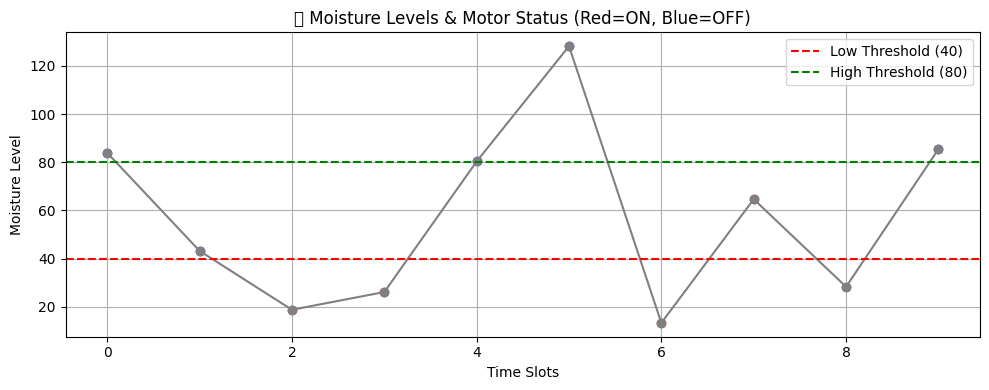

In [ ]:
# Cell 1 — Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime, random, time

# Cell 2 — Upload Dataset
from google.colab import files
print("📁 Please upload your 'Crop_recommendation.csv' file")
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print("\n✅ Data Loaded Successfully!")
print(df.head())

# Cell 3 — Preprocess Data
features = df.drop('label', axis=1)
labels = df['label']

scaler = MinMaxScaler()
X = scaler.fit_transform(features)

le = LabelEncoder()
y = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Cell 4 — Build LSTM Model
model_lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Cell 5 — Train LSTM Model
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)
print("\n✅ LSTM Model Training Complete!")

# Cell 6 — Build & Train RNN Model
model_rnn = Sequential([
    SimpleRNN(64, input_shape=(1, X_train.shape[2]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)
print("\n✅ RNN Model Training Complete!")

# Cell 7 — Predict Crop (LSTM & RNN)
sample = np.expand_dims(X_test[5], axis=0)
crop_lstm = le.inverse_transform([np.argmax(model_lstm.predict(sample))])[0]
crop_rnn = le.inverse_transform([np.argmax(model_rnn.predict(sample))])[0]

print(f"🌱 LSTM Predicted Crop: {crop_lstm}")
print(f"🌾 RNN Predicted Crop: {crop_rnn}")

# Cell 8 — Simulate IoT Moisture Sensor
moisture_levels = [random.uniform(10, 120) for _ in range(10)]
iot_df = pd.DataFrame({
    "Time": [(datetime.datetime.now() + datetime.timedelta(hours=i)).strftime("%H:%M:%S") for i in range(10)],
    "Moisture": moisture_levels
})
iot_df.head()

# Cell 9 — Smart Crop-Based Motor Control
# ✅ Crop-specific water needs (in mm moisture range)
crop_water_needs = {
    'rice': (70, 110),
    'papaya': (60, 100),
    'banana': (60, 100),
    'cotton': (50, 90),
    'maize': (40, 80),
    'chickpea': (30, 70),
    'lentil': (25, 60),
    'wheat': (35, 75),
    'coffee': (45, 85),
    'orange': (50, 90),
    'apple': (40, 85)
}
# ✅ Select the LSTM-predicted crop
selected_crop = crop_lstm.lower()
low, high = crop_water_needs.get(selected_crop, (40, 80))

print(f"🌾 Crop selected: {selected_crop.capitalize()}")
print(f"💧 Ideal moisture range: {low}–{high} mm\n")

# ✅ Simulate real sensor fluctuations (to get both ON & OFF)
iot_df["Moisture"] = iot_df["Moisture"] + np.random.uniform(-40, 40, len(iot_df))

# ✅ Dynamic motor control logic
def motor_status(m):
    if m < low:
        return "ON"
    elif m > high:
        return "OFF"
    else:
        # between low and high → retain previous state
        return motor_state[-1] if len(motor_state) else "OFF"

motor_state = []
for m in iot_df["Moisture"]:
    motor_state.append(motor_status(m))
iot_df["Motor"] = motor_state

print(iot_df.head(10))

# Cell 10 — Simple Motor Control Graph
plt.figure(figsize=(10,4))
plt.plot(iot_df["Moisture"], marker='o', color='gray', lw=1.5)

for i, status in enumerate(iot_df["Motor"]):
    color = "red" if status == "ON" else "blue"
    plt.scatter(i, iot_df["Moisture"][i], color=color, s=35)
plt.axhline(low, color='red', linestyle='--', label=f'Low Threshold ({low})')
plt.axhline(high, color='green', linestyle='--', label=f'High Threshold ({high})')
plt.title("💧 Moisture Levels & Motor Status (Red=ON, Blue=OFF)")
plt.xlabel("Time Slots")
plt.ylabel("Moisture Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📁 Please upload your 'Crop_recommendation.csv' file


Saving Crop_recommendation dataset.csv to Crop_recommendation dataset (1).csv

✅ Data Loaded Successfully!
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0907 - loss: 3.0764 - val_accuracy: 0.1932 - val_loss: 2.9994
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1946 - loss: 2.9351 - val_accuracy: 0.1307 - val_loss: 2.5792
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2053 - loss: 2.4126 - val_accuracy: 0.4006 - val_loss: 2.0177
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4582 - loss: 1.8584 - val_accuracy: 0.6420 - val_loss: 1.4568
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6667 - loss: 1.3538 - val_accuracy: 0.6960 - val_loss: 1.0919
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7346 - loss: 1.0327 - val_accuracy: 0.7557 - val_loss: 0.8815
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.8372 - val_accuracy: 0.7898 - val_loss: 0.7334
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7990 - loss: 0.7212 - val_accuracy: 0.8125 - val_loss: 0.6426
Ep

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


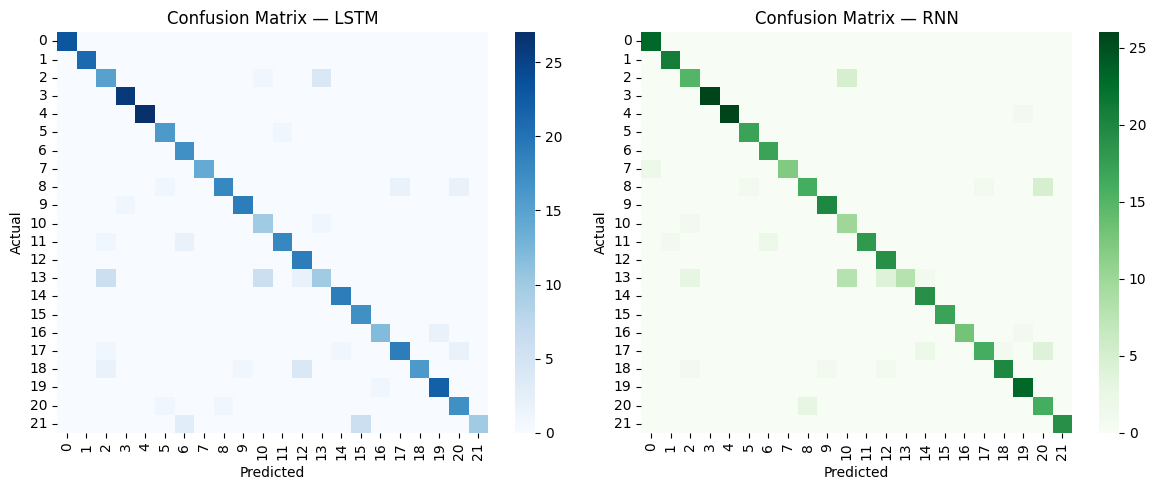

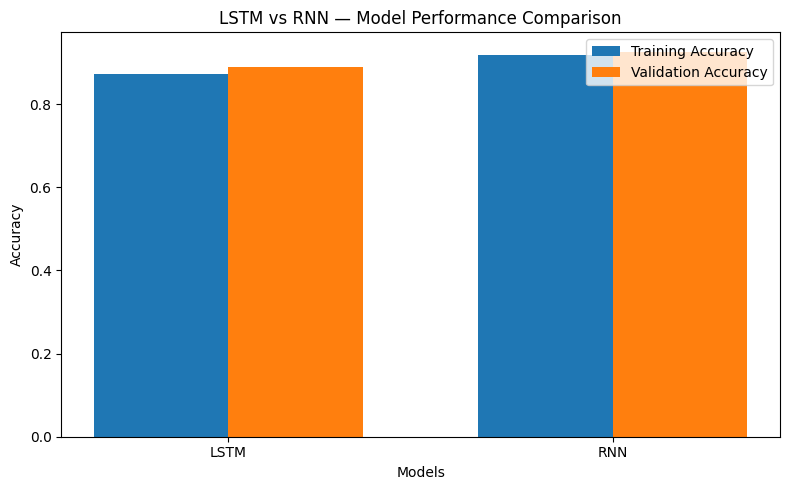


🌾 Crop selected: Mango
💧 Ideal moisture range: 40–80 mm

       Time    Moisture Motor
0  13:13:51  110.422250   OFF
1  14:13:51  113.424109   OFF
2  15:13:51   64.270284   OFF
3  16:13:51   26.886850    ON
4  17:13:51   72.063590    ON
5  18:13:51   51.567220    ON
6  19:13:51   72.032329    ON
7  20:13:51   51.347885    ON
8  21:13:51   34.348703    ON
9  22:13:51   69.888978    ON


/tmp/ipython-input-3080929134.py:200: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


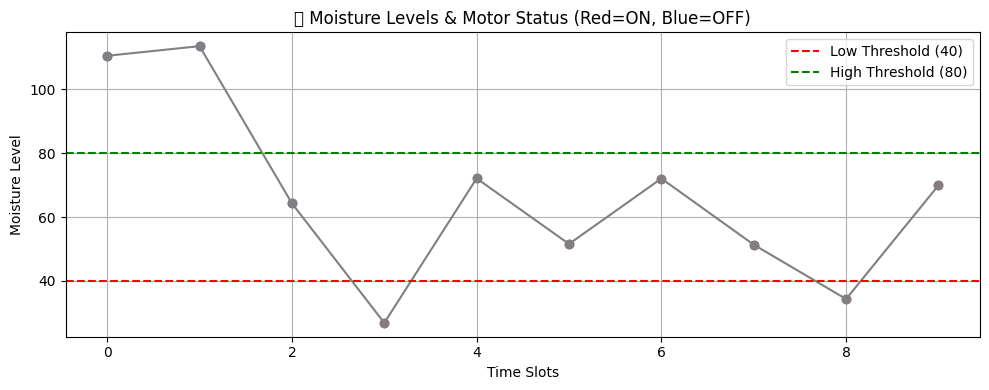

In [ ]:
# -----------------------------------------------------------
# Cell 1 — Import Libraries
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import datetime, random, time

# -----------------------------------------------------------
# Cell 2 — Upload Dataset
# -----------------------------------------------------------
from google.colab import files
print("📁 Please upload your 'Crop_recommendation.csv' file")
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print("\n✅ Data Loaded Successfully!")
print(df.head())

# -----------------------------------------------------------
# Cell 3 — Preprocess Data
# -----------------------------------------------------------
features = df.drop('label', axis=1)
labels = df['label']

scaler = MinMaxScaler()
X = scaler.fit_transform(features)

le = LabelEncoder()
y = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# -----------------------------------------------------------
# Cell 4 — Build LSTM Model
# -----------------------------------------------------------
model_lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# -----------------------------------------------------------
# Cell 5 — Train LSTM Model
# -----------------------------------------------------------
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)
print("\n✅ LSTM Model Training Complete!")

# -----------------------------------------------------------
# Cell 6 — Build & Train RNN Model
# -----------------------------------------------------------
model_rnn = Sequential([
    SimpleRNN(64, input_shape=(1, X_train.shape[2]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)
print("\n✅ RNN Model Training Complete!")

# -----------------------------------------------------------
# Cell 7 — Predict Crop (LSTM & RNN)
# -----------------------------------------------------------
sample = np.expand_dims(X_test[5], axis=0)
crop_lstm = le.inverse_transform([np.argmax(model_lstm.predict(sample))])[0]
crop_rnn = le.inverse_transform([np.argmax(model_rnn.predict(sample))])[0]

print(f"🌱 LSTM Predicted Crop: {crop_lstm}")
print(f"🌾 RNN Predicted Crop: {crop_rnn}")

# -----------------------------------------------------------
# ✅ Cell 8 — Crop Prediction Results (Confusion Matrix)
# -----------------------------------------------------------
y_pred_lstm = np.argmax(model_lstm.predict(X_test), axis=1)
y_pred_rnn = np.argmax(model_rnn.predict(X_test), axis=1)

cm_lstm = confusion_matrix(y_test, y_pred_lstm)
cm_rnn = confusion_matrix(y_test, y_pred_rnn)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(cm_lstm, annot=False, cmap="Blues")
plt.title("Confusion Matrix — LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(cm_rnn, annot=False, cmap="Greens")
plt.title("Confusion Matrix — RNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# ✅ Cell 9 — Model Training Results (Grouped Bar Chart)
# -----------------------------------------------------------
lstm_train_acc = history_lstm.history['accuracy'][-1]
lstm_val_acc = history_lstm.history['val_accuracy'][-1]
rnn_train_acc = history_rnn.history['accuracy'][-1]
rnn_val_acc = history_rnn.history['val_accuracy'][-1]

models = ['LSTM', 'RNN']
train_acc = [lstm_train_acc, rnn_train_acc]
val_acc = [lstm_val_acc, rnn_val_acc]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_acc, width, label='Training Accuracy')
plt.bar(x + width/2, val_acc, width, label='Validation Accuracy')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("LSTM vs RNN — Model Performance Comparison")
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# Cell 10 — IoT Moisture Simulation
# -----------------------------------------------------------
moisture_levels = [random.uniform(10, 120) for _ in range(10)]
iot_df = pd.DataFrame({
    "Time": [(datetime.datetime.now() + datetime.timedelta(hours=i)).strftime("%H:%M:%S") for i in range(10)],
    "Moisture": moisture_levels
})

# -----------------------------------------------------------
# Cell 11 — Smart Motor Control Logic
# -----------------------------------------------------------
crop_water_needs = {
    'rice': (70, 110),
    'papaya': (60, 100),
    'banana': (60, 100),
    'cotton': (50, 90),
    'maize': (40, 80),
    'chickpea': (30, 70),
    'lentil': (25, 60),
    'wheat': (35, 75),
    'coffee': (45, 85),
    'orange': (50, 90),
    'apple': (40, 85)
}

selected_crop = crop_lstm.lower()
low, high = crop_water_needs.get(selected_crop, (40, 80))

print(f"\n🌾 Crop selected: {selected_crop.capitalize()}")
print(f"💧 Ideal moisture range: {low}–{high} mm\n")

iot_df["Moisture"] = iot_df["Moisture"] + np.random.uniform(-40, 40, len(iot_df))

def motor_status(m):
    if m < low:
        return "ON"
    elif m > high:
        return "OFF"
    else:
        return motor_state[-1] if len(motor_state) else "OFF"

motor_state = []
for m in iot_df["Moisture"]:
    motor_state.append(motor_status(m))
iot_df["Motor"] = motor_state

print(iot_df.head(10))

# -----------------------------------------------------------
# Cell 12 — Plot Moisture and Motor Status
# -----------------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(iot_df["Moisture"], marker='o', color='gray', lw=1.5)

for i, status in enumerate(iot_df["Motor"]):
    color = "red" if status == "ON" else "blue"
    plt.scatter(i, iot_df["Moisture"][i], color=color, s=35)

plt.axhline(low, color='red', linestyle='--', label=f'Low Threshold ({low})')
plt.axhline(high, color='green', linestyle='--', label=f'High Threshold ({high})')
plt.title("💧 Moisture Levels & Motor Status (Red=ON, Blue=OFF)")
plt.xlabel("Time Slots")
plt.ylabel("Moisture Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
